# Load Libraries

In [1]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import yeojohnson
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,  roc_auc_score, roc_curve 
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from dmba import classificationSummary, AIC_score, BIC_score, plotDecisionTree,gainsChart
from scikitplot.metrics import plot_lift_curve, plot_cumulative_gain
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.metrics import specificity_score, sensitivity_score
from imblearn.under_sampling import RandomUnderSampler
from tabulate import tabulate
from scikitplot.metrics import plot_lift_curve
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# Load Data

## Un-matched dataset

In [33]:
#Load dataset
pcs = pd.read_csv(r'C:\Users\Halee\Downloads\final_data.csv')
pcs.head()

,participant_type,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,financial_stress_1,global_qol_scale,...,duration,tbi_prob,mental,tbi_covid,psqi_glob,vs_p_rt_mn_s,f_c_rt_mn,cpt_profile,vacc_bi,cardio_bi
0,Vet,Man,White,Non,3,0,0,Cov,2,40,...,10,Mod,0,Before,16.0,2595.966667,460.100000,0.0,Before,0
1,Vet,Man,Asian,Non,1,0,0,Emp,1,90,...,3,None,0,NaN,6.0,704.333333,457.416667,3.0,Before,1
2,Vet,Woman,White,Non,2,0,0,Emp,1,85,...,10,Mild,2,NaN,7.0,980.250000,511.483333,0.0,Before,1
3,Vet,Man,More,Non,1,1,0,Emp,2,55,...,87,Mild,1,Before,16.0,727.766667,496.825000,0.0,Before,0
4,Vet,Man,White,Non,1,0,0,Emp,2,55,...,24,None,0,NaN,10.0,1037.700000,720.416667,2.0,After,1


In [4]:
pcs.shape

(788, 35)

## Matched dataset

In [65]:
# Load matched dataset
pcs_m = pd.read_csv(r'C:\Users\Halee\Downloads\match_data.csv')
pcs_m.head()

,participant_type,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,financial_stress_1,global_qol_scale,...,duration,tbi_prob,mental,tbi_covid,psqi_glob,vs_p_rt_mn_s,f_c_rt_mn,cpt_profile,vacc_bi,cardio_bi
0,Vet,Man,White,Non,3,0,0,Cov,2,40,...,10,Mod,0,Before,16.0,2595.966667,460.100000,0.0,Before,0
1,Vet,Woman,White,Non,2,0,0,Emp,1,85,...,10,Mild,2,NaN,7.0,980.250000,511.483333,0.0,Before,1
2,Vet,Man,More,Non,1,1,0,Emp,2,55,...,87,Mild,1,Before,16.0,727.766667,496.825000,0.0,Before,0
3,Vet,Man,White,Non,1,0,0,Emp,2,55,...,24,None,0,NaN,10.0,1037.700000,720.416667,2.0,After,1
4,Vet,Man,White,Non,1,0,0,Emp,1,85,...,3,Mild,0,NaN,4.0,664.766667,493.495833,3.0,Before,0


## Cognitive Data Only

In [ ]:
pcs_c = pd.read_csv(r'C:\Users\Halee\Downloads\cog_data.csv')
pcs_c.head()

# Verify dataframe info

In [5]:
pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 788 non-null    object 
 1   race                   788 non-null    object 
 2   ethnicity              788 non-null    object 
 3   racial_stress          788 non-null    int64  
 4   nicotine_status        788 non-null    int64  
 5   rehab_status           788 non-null    int64  
 6   unemployment_covid     788 non-null    object 
 7   financial_stress_1     788 non-null    int64  
 8   global_qol_scale       788 non-null    int64  
 9   func_status_1          788 non-null    int64  
 10  pcfs_grade_status      786 non-null    float64
 11  initial_symptom_score  788 non-null    int64  
 12  meds                   786 non-null    float64
 13  pre_pandemic           786 non-null    float64
 14  promis_cog_score       786 non-null    float64
 15  hit6_s

In [66]:
pcs_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_type       303 non-null    object 
 1   gender                 303 non-null    object 
 2   race                   303 non-null    object 
 3   ethnicity              303 non-null    object 
 4   racial_stress          303 non-null    int64  
 5   nicotine_status        303 non-null    int64  
 6   rehab_status           303 non-null    int64  
 7   unemployment_covid     303 non-null    object 
 8   financial_stress_1     303 non-null    int64  
 9   global_qol_scale       303 non-null    int64  
 10  func_status_1          303 non-null    int64  
 11  pcfs_grade_status      301 non-null    float64
 12  initial_symptom_score  303 non-null    int64  
 13  meds                   301 non-null    float64
 14  pre_pandemic           301 non-null    float64
 15  promis

# Verify Outcome Variable Proportions

In [6]:
pcs['pcs_diag'].value_counts()

Healthy    512
PASC       272
Name: pcs_diag, dtype: int64

# Udpate data types

In [7]:
pcs['gender'] = pcs['gender'].astype('category')
pcs['race'] = pcs['race'].astype('category')
pcs['ethnicity'] = pcs['ethnicity'].astype('category')
pcs['unemployment_covid'] = pcs['unemployment_covid'].astype('category')
pcs['meds'] = pcs['meds'].astype('category')
pcs['pcs_diag'] = pcs['pcs_diag'].astype('category')
pcs['pcs_diag'] = pcs['pcs_diag'].astype('category')
pcs['tbi_prob'] = pcs['tbi_prob'].astype('category')
pcs['tbi_covid'] = pcs['tbi_covid'].astype('category')
pcs['vacc_bi'] = pcs['vacc_bi'].astype('category')
pcs['nicotine_status'] = pcs['nicotine_status'].astype('category')
pcs['rehab_status'] = pcs['rehab_status'].astype('category')
pcs['cardio_bi'] = pcs['cardio_bi'].astype('category')
pcs['cpt_profile'] = pcs['cpt_profile'].astype('category')


In [8]:
pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 788 entries, 0 to 787
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   gender                 788 non-null    category
 1   race                   788 non-null    category
 2   ethnicity              788 non-null    category
 3   racial_stress          788 non-null    int64   
 4   nicotine_status        788 non-null    category
 5   rehab_status           788 non-null    category
 6   unemployment_covid     788 non-null    category
 7   financial_stress_1     788 non-null    int64   
 8   global_qol_scale       788 non-null    int64   
 9   func_status_1          788 non-null    int64   
 10  pcfs_grade_status      786 non-null    float64 
 11  initial_symptom_score  788 non-null    int64   
 12  meds                   786 non-null    category
 13  pre_pandemic           786 non-null    float64 
 14  promis_cog_score       786 non-null    flo

# Define numerical and categorical variables

In [67]:
cats = ['cpt_profile', 'participant_type',
        'gender', 
        'race', 'ethnicity', 
        'nicotine_status', 'rehab_status', 'unemployment_covid', 
        'meds', 'tbi_prob', 'tbi_covid', 'vacc_bi', 'cardio_bi']
nums = ['global_qol_scale', 
        'initial_symptom_score', 
        'pre_pandemic',
        'promis_cog_score', 
        'hit6_score', 
        'fatigue_score',
        'gad7_tot_score', 
        'phq9_total', 
        'pss_overall_score', 
        'social_support_score', 
        'dvprs_score', 
        'dyspnoea_12_score', 
        'BMI', 
        'duration', 
        'psqi_glob', 
        'mental', 
        #'vs_p_rt_mn_s', 
        #'f_c_rt_mn',
        'racial_stress', 
        'financial_stress_1', 
        'func_status_1'] 
        #'pcfs_grade_status']
all_vars = cats+nums

# Create Transformation Pipeline

In [68]:
# Create a categorical processing pipeline that uses one-hot encoding, dropping binary columns.
cat_pipe = Pipeline([('encoder', OneHotEncoder(drop='if_binary'))])
# Create a numerical processing pipeline that uses skewness correction/center/scale.
num_pipe = Pipeline([('skew_standardize', PowerTransformer())])

# Combine pipeline steps
all_pipe = make_pipeline(ColumnTransformer([('cat', cat_pipe, cats), 
                                            ('num', num_pipe, nums)],
                                          verbose_feature_names_out=False))
# Verify steps
all_pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(drop='if_binary'))]),
                                  ['cpt_profile', 'participant_type', 'gender',
                                   'race', 'ethnicity', 'nicotine_status',
                                   'rehab_status', 'unemployment_covid', 'meds',
                                   'tbi_prob', 'tbi_covid', 'vacc_bi',
                                   'cardio_bi']),
                                 ('num',
                                  Pipeline(steps=[('skew_standardize',
                                                   PowerTransformer())]),
                                  ['global_qol_scale', 'initial_symptom_score',
                                   'pre_pandemic', 'promis_cog_score',
                                   'hit6_score', 'fatigue_score',
                             

# Split Data into Training and Test Sets for Predictive Model

In [53]:
# Split the data into features (X) and the binary target variable (y).
X = pcs[all_vars]

#Make outcome variable into binary variable
pcs['pcs_diag'] = pcs['pcs_diag'].apply(lambda x: 1 if x == 'PASC' else 0)

#Define outcome variable
y = pcs[['pcs_diag']]


#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=1)

In [12]:
#Confirm stratified split
y_train.value_counts()/len(y_train)

pcs_diag
0           0.653358
1           0.341198
dtype: float64

In [13]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 45 to 37
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pcs_diag  548 non-null    category
dtypes: category(1)
memory usage: 5.0 KB


In [14]:
X_train.head()

,cpt_profile,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,meds,tbi_prob,tbi_covid,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,financial_stress_1,func_status_1,pcfs_grade_status
45,NaN,Man,White,Non,0,0,Emp,0.0,None,NaN,...,5.0,0.0,21.8,8,7.0,0,1,1,2,0.0
496,NaN,Woman,Black,Non,0,0,Unemp,1.0,None,NaN,...,0.0,0.0,27.3,9,9.0,1,2,1,2,1.0
657,0.0,Man,White,Non,1,0,Emp,0.0,None,NaN,...,0.0,0.0,28.9,4,3.0,2,3,2,2,1.0
274,NaN,Man,White,Non,0,0,Emp,0.0,None,NaN,...,0.0,0.0,30.2,20,4.0,0,1,1,2,0.0
649,0.0,Woman,Black,Non,1,0,Emp,0.0,None,NaN,...,0.0,0.0,35.4,3,8.0,0,2,1,1,0.0


array([[<AxesSubplot:title={'center':'global_qol_scale'}>,
        <AxesSubplot:title={'center':'initial_symptom_score'}>,
        <AxesSubplot:title={'center':'pre_pandemic'}>,
        <AxesSubplot:title={'center':'promis_cog_score'}>],
       [<AxesSubplot:title={'center':'hit6_score'}>,
        <AxesSubplot:title={'center':'fatigue_score'}>,
        <AxesSubplot:title={'center':'gad7_tot_score'}>,
        <AxesSubplot:title={'center':'phq9_total'}>],
       [<AxesSubplot:title={'center':'pss_overall_score'}>,
        <AxesSubplot:title={'center':'social_support_score'}>,
        <AxesSubplot:title={'center':'dvprs_score'}>,
        <AxesSubplot:title={'center':'dyspnoea_12_score'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'psqi_glob'}>,
        <AxesSubplot:title={'center':'mental'}>],
       [<AxesSubplot:title={'center':'racial_stress'}>,
        <AxesSubplot:title={'center':'financial_s

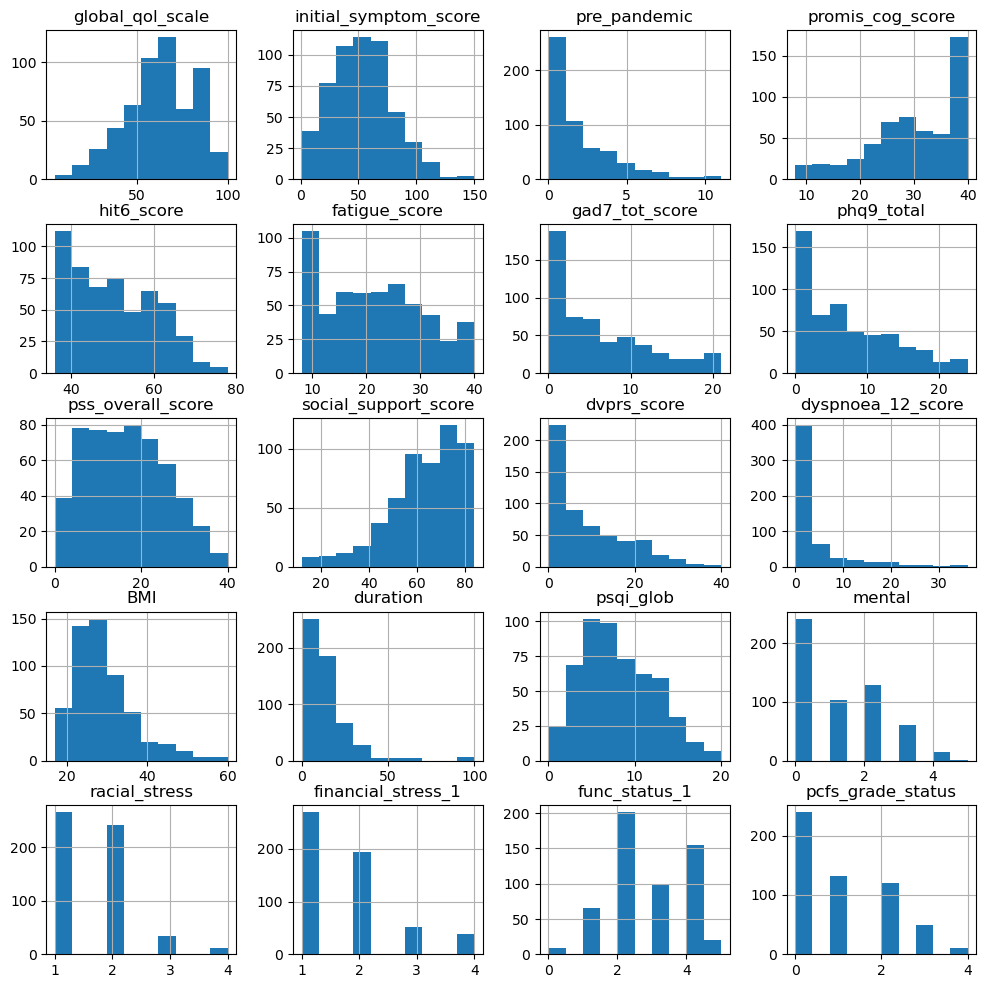

In [15]:
X_train.hist(figsize = (12,12))

In [16]:
X_train.describe()

,global_qol_scale,initial_symptom_score,pre_pandemic,promis_cog_score,hit6_score,fatigue_score,gad7_tot_score,phq9_total,pss_overall_score,social_support_score,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,financial_stress_1,func_status_1,pcfs_grade_status
count,551.000000,551.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,544.000000,551.000000,540.000000,551.000000,551.000000,551.000000,551.000000,550.000000
mean,63.375681,53.110708,2.141818,30.158182,50.412727,21.309091,6.323636,7.225455,16.156364,63.209091,8.298182,3.361818,28.912132,13.820327,7.538889,1.103448,1.620690,1.742287,2.700544,1.016364
std,19.608497,26.398356,2.169056,8.466503,9.972577,9.202979,5.847546,6.378191,9.083357,15.350131,8.941736,6.244414,7.496821,13.367614,4.170793,1.174814,0.692458,0.889744,1.153327,1.083787
min,5.000000,1.000000,0.000000,8.000000,36.000000,8.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,50.000000,33.500000,0.000000,24.000000,42.000000,14.000000,1.000000,2.000000,9.000000,55.000000,0.000000,0.000000,23.600000,7.000000,4.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,70.000000,52.000000,2.000000,31.000000,49.500000,21.000000,5.000000,6.000000,16.000000,66.000000,5.000000,0.000000,27.400000,10.000000,7.000000,1.000000,2.000000,2.000000,2.000000,1.000000
75%,80.000000,69.000000,3.000000,38.000000,59.000000,28.000000,10.000000,11.000000,23.000000,73.750000,14.000000,4.000000,32.500000,16.000000,10.000000,2.000000,2.000000,2.000000,4.000000,2.000000
max,100.000000,150.000000,11.000000,40.000000,78.000000,40.000000,21.000000,24.000000,40.000000,84.000000,40.000000,36.000000,60.000000,100.000000,20.000000,5.000000,4.000000,4.000000,5.000000,4.000000


# Impute missing values

In [54]:
X_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_train), 
                           columns = X_train.columns.to_list())
X_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_test),
                         columns = X_test.columns.to_list())

In [18]:
X_train_imp.head()

,cpt_profile,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,meds,tbi_prob,tbi_covid,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,financial_stress_1,func_status_1,pcfs_grade_status
0,0.0,Man,White,Non,0,0,Emp,0.0,None,Before,...,5.0,0.0,21.8,8,7.0,0,1,1,2,0.0
1,0.0,Woman,Black,Non,0,0,Unemp,1.0,None,Before,...,0.0,0.0,27.3,9,9.0,1,2,1,2,1.0
2,0.0,Man,White,Non,1,0,Emp,0.0,None,Before,...,0.0,0.0,28.9,4,3.0,2,3,2,2,1.0
3,0.0,Man,White,Non,0,0,Emp,0.0,None,Before,...,0.0,0.0,30.2,20,4.0,0,1,1,2,0.0
4,0.0,Woman,Black,Non,1,0,Emp,0.0,None,Before,...,0.0,0.0,35.4,3,8.0,0,2,1,1,0.0


In [19]:
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cpt_profile            551 non-null    object
 1   gender                 551 non-null    object
 2   race                   551 non-null    object
 3   ethnicity              551 non-null    object
 4   nicotine_status        551 non-null    object
 5   rehab_status           551 non-null    object
 6   unemployment_covid     551 non-null    object
 7   meds                   551 non-null    object
 8   tbi_prob               551 non-null    object
 9   tbi_covid              551 non-null    object
 10  vacc_bi                551 non-null    object
 11  cardio_bi              551 non-null    object
 12  global_qol_scale       551 non-null    object
 13  initial_symptom_score  551 non-null    object
 14  pre_pandemic           551 non-null    object
 15  promis_cog_score       

In [56]:
#update data types
X_train_imp['gender'] = X_train_imp['gender'].astype('category')
X_train_imp['race'] = X_train_imp['race'].astype('category')
X_train_imp['ethnicity'] = X_train_imp['ethnicity'].astype('category')
X_train_imp['unemployment_covid'] = X_train_imp['unemployment_covid'].astype('category')
X_train_imp['meds'] = X_train_imp['meds'].astype('category')
X_train_imp['tbi_prob'] = X_train_imp['tbi_prob'].astype('category')
X_train_imp['tbi_covid'] = X_train_imp['tbi_covid'].astype('category')
X_train_imp['vacc_bi'] = X_train_imp['vacc_bi'].astype('category')
X_train_imp['nicotine_status'] = X_train_imp['nicotine_status'].astype('category')
X_train_imp['rehab_status'] = X_train_imp['rehab_status'].astype('category')
X_train_imp['cardio_bi'] = X_train_imp['cardio_bi'].astype('category')
X_train_imp['cpt_profile'] = X_train_imp['cpt_profile'].astype('category')

X_train_imp['global_qol_scale'] = X_train_imp['global_qol_scale'].astype('int64')
X_train_imp['initial_symptom_score'] = X_train_imp['initial_symptom_score'].astype('int64')
X_train_imp['pre_pandemic'] = X_train_imp['pre_pandemic'].astype('int64')
X_train_imp['promis_cog_score'] = X_train_imp['promis_cog_score'].astype('int64')
X_train_imp['hit6_score'] = X_train_imp['hit6_score'].astype('int64')
X_train_imp['fatigue_score'] = X_train_imp['fatigue_score'].astype('int64')
X_train_imp['gad7_tot_score'] = X_train_imp['gad7_tot_score'].astype('int64')
X_train_imp['phq9_total'] = X_train_imp['phq9_total'].astype('int64')
X_train_imp['pss_overall_score'] = X_train_imp['pss_overall_score'].astype('int64')
X_train_imp['social_support_score'] = X_train_imp['social_support_score'].astype('int64')
X_train_imp['dvprs_score'] = X_train_imp['dvprs_score'].astype('int64')
X_train_imp['dyspnoea_12_score'] = X_train_imp['dyspnoea_12_score'].astype('int64')
X_train_imp['BMI'] = X_train_imp['BMI'].astype('int64')
X_train_imp['duration'] = X_train_imp['duration'].astype('int64')
X_train_imp['psqi_glob'] = X_train_imp['psqi_glob'].astype('int64')
X_train_imp['mental'] = X_train_imp['mental'].astype('int64')
#X_train_imp['vs_p_rt_mn_s'] = X_train_imp['vs_p_rt_mn_s'].astype('float64')
#X_train_imp['f_c_rt_mn'] = X_train_imp['f_c_rt_mn'].astype('float64')
X_train_imp['racial_stress'] = X_train_imp['racial_stress'].astype('int64')
X_train_imp['financial_stress_1'] = X_train_imp['financial_stress_1'].astype('int64')
X_train_imp['func_status_1'] = X_train_imp['func_status_1'].astype('int64')
#X_train_imp['pcfs_grade_status'] = X_train_imp['pcfs_grade_status'].astype('int64')


In [21]:
X_test_imp.head()

,cpt_profile,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,meds,tbi_prob,tbi_covid,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,financial_stress_1,func_status_1,pcfs_grade_status
0,0.0,Man,White,Non,1,0,Emp,0.0,None,Before,...,12.0,0.0,31.2,6,9.0,0,2,1,1,0.0
1,0.0,Man,White,Non,0,0,Unemp,0.0,Mild,Before,...,0.0,0.0,23.7,10,3.0,1,1,1,1,0.0
2,0.0,Woman,White,Non,0,0,Cov,1.0,Mild,Before,...,13.0,33.0,17.8,29,17.0,2,1,4,3,3.0
3,0.0,Woman,White,Non,0,0,Unemp,1.0,None,Before,...,14.0,0.0,41.6,15,11.0,2,2,3,4,1.0
4,0.0,Man,White,Non,1,0,Unemp,1.0,None,Before,...,2.0,0.0,22.1,12,5.0,0,3,1,1,0.0


In [22]:
X_test_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cpt_profile            237 non-null    object
 1   gender                 237 non-null    object
 2   race                   237 non-null    object
 3   ethnicity              237 non-null    object
 4   nicotine_status        237 non-null    object
 5   rehab_status           237 non-null    object
 6   unemployment_covid     237 non-null    object
 7   meds                   237 non-null    object
 8   tbi_prob               237 non-null    object
 9   tbi_covid              237 non-null    object
 10  vacc_bi                237 non-null    object
 11  cardio_bi              237 non-null    object
 12  global_qol_scale       237 non-null    object
 13  initial_symptom_score  237 non-null    object
 14  pre_pandemic           237 non-null    object
 15  promis_cog_score       

In [37]:
#update data types
X_test_imp['gender'] = X_test_imp['gender'].astype('category')
X_test_imp['race'] = X_test_imp['race'].astype('category')
X_test_imp['ethnicity'] = X_test_imp['ethnicity'].astype('category')
X_test_imp['unemployment_covid'] = X_test_imp['unemployment_covid'].astype('category')
X_test_imp['meds'] = X_test_imp['meds'].astype('category')
X_test_imp['tbi_prob'] = X_test_imp['tbi_prob'].astype('category')
X_test_imp['tbi_covid'] = X_test_imp['tbi_covid'].astype('category')
X_test_imp['vacc_bi'] = X_test_imp['vacc_bi'].astype('category')
X_test_imp['nicotine_status'] = X_test_imp['nicotine_status'].astype('category')
X_test_imp['rehab_status'] = X_test_imp['rehab_status'].astype('category')
X_test_imp['cardio_bi'] = X_test_imp['cardio_bi'].astype('category')
X_test_imp['cpt_profile'] = X_test_imp['cpt_profile'].astype('category')

X_test_imp['global_qol_scale'] = X_test_imp['global_qol_scale'].astype('int64')
X_test_imp['initial_symptom_score'] = X_test_imp['initial_symptom_score'].astype('int64')
X_test_imp['pre_pandemic'] = X_test_imp['pre_pandemic'].astype('int64')
X_test_imp['promis_cog_score'] = X_test_imp['promis_cog_score'].astype('int64')
X_test_imp['hit6_score'] = X_test_imp['hit6_score'].astype('int64')
X_test_imp['fatigue_score'] = X_test_imp['fatigue_score'].astype('int64')
X_test_imp['gad7_tot_score'] = X_test_imp['gad7_tot_score'].astype('int64')
X_test_imp['phq9_total'] = X_test_imp['phq9_total'].astype('int64')
X_test_imp['pss_overall_score'] = X_test_imp['pss_overall_score'].astype('int64')
X_test_imp['social_support_score'] = X_test_imp['social_support_score'].astype('int64')
X_test_imp['dvprs_score'] = X_test_imp['dvprs_score'].astype('int64')
X_test_imp['dyspnoea_12_score'] = X_test_imp['dyspnoea_12_score'].astype('int64')
X_test_imp['BMI'] = X_test_imp['BMI'].astype('int64')
X_test_imp['duration'] = X_test_imp['duration'].astype('int64')
X_test_imp['psqi_glob'] = X_test_imp['psqi_glob'].astype('int64')
X_test_imp['mental'] = X_test_imp['mental'].astype('int64')
#X_test_imp['vs_p_rt_mn_s'] = X_test_imp['vs_p_rt_mn_s'].astype('float64')
#X_test_imp['f_c_rt_mn'] = X_test_imp['f_c_rt_mn'].astype('float64')
X_test_imp['racial_stress'] = X_test_imp['racial_stress'].astype('int64')
X_test_imp['financial_stress_1'] = X_test_imp['financial_stress_1'].astype('int64')
X_test_imp['func_status_1'] = X_test_imp['func_status_1'].astype('int64')
X_test_imp['pcfs_grade_status'] = X_test_imp['pcfs_grade_status'].astype('int64')


# Transform Data with Pipeline

In [38]:
#Fit pipeline to resampled data
X_train_fit = all_pipe.fit(X_train_imp)
#Get feature names out from fit and create as new list
X_train_cols = X_train_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_train_pipe = pd.DataFrame(all_pipe.fit_transform(X_train_imp), columns = X_train_cols)

In [39]:
X_train_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cpt_profile_0.0           564 non-null    float64
 1   cpt_profile_1.0           564 non-null    float64
 2   cpt_profile_2.0           564 non-null    float64
 3   cpt_profile_3.0           564 non-null    float64
 4   participant_type_Vet      564 non-null    float64
 5   gender_Man                564 non-null    float64
 6   gender_NonBi              564 non-null    float64
 7   gender_Trans              564 non-null    float64
 8   gender_Woman              564 non-null    float64
 9   race_Asian                564 non-null    float64
 10  race_Black                564 non-null    float64
 11  race_HI/PI/AL/Oth         564 non-null    float64
 12  race_More                 564 non-null    float64
 13  race_White                564 non-null    float64
 14  ethnicity_

In [40]:
#Create new dataframe with transformed testing data, and apply feature name list as column names
#Fit pipeline to resampled data
X_test_fit = all_pipe.fit(X_test_imp)
#Get feature names out from fit and create as new list
X_test_cols = X_test_fit.get_feature_names_out().tolist()
X_test_pipe = pd.DataFrame(all_pipe.fit_transform(X_test_imp), columns = X_test_cols)

In [41]:
X_test_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cpt_profile_0.0           242 non-null    float64
 1   cpt_profile_1.0           242 non-null    float64
 2   cpt_profile_2.0           242 non-null    float64
 3   cpt_profile_3.0           242 non-null    float64
 4   participant_type_Vet      242 non-null    float64
 5   gender_Man                242 non-null    float64
 6   gender_NonBi              242 non-null    float64
 7   gender_Trans              242 non-null    float64
 8   gender_Woman              242 non-null    float64
 9   race_Asian                242 non-null    float64
 10  race_Black                242 non-null    float64
 11  race_HI/PI/AL/Oth         242 non-null    float64
 12  race_More                 242 non-null    float64
 13  race_White                242 non-null    float64
 14  ethnicity_

In [42]:
# Display the shapes of different datasets to check their dimensions
X_train_pipe.shape, X_test_pipe.shape

((564, 50), (242, 50))

# Impute Missing PASC Diagnosis for NA values

In [43]:
y_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_train), 
                           columns = y_train.columns.to_list())
y_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_test), 
                           columns = y_test.columns.to_list())

C:\Users\halee\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)
C:\Users\halee\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode 

## Rebalance training set for 50/50 class proportion

In [44]:
# Create a RandomUnderSampler instance with a specified random seed and sampling strategy
rus = RandomUnderSampler(random_state = 1, sampling_strategy='majority')

# Perform random under-sampling on the training dataset
X_train_under, y_train_under = rus.fit_resample(X_train_pipe, y_train_imp)

In [45]:
# Check proportions 
y_train_under.value_counts()

pcs_diag
0           198
1           198
dtype: int64

## Remove C-1 dummies for logistic regression classifier

In [46]:
# Remove specific columns from the datasets
X_train_log = X_train_under.drop(['cpt_profile_0.0', 'gender_Man', 'race_Asian', 'unemployment_covid_Cov',
                                 'tbi_prob_None', 'vacc_bi_None'], axis = 1)
X_test_log = X_test_pipe.drop(['cpt_profile_0.0', 'gender_Man', 'race_Asian', 'unemployment_covid_Cov',
                                 'tbi_prob_None', 'vacc_bi_None'], axis = 1)

# Create Tranformed Dataset with All Data for Explanatory Model

In [69]:
# Split the data into features (X) and the binary target variable (y).
X_m = pcs_m[all_vars]

#Make outcome variable into binary variable
pcs_m['pcs_diag'] = pcs_m['pcs_diag'].apply(lambda x: 1 if x == 'PASC' else 0)

#Define outcome variable
y_m = pcs_m[['pcs_diag']]


X_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_m), 
                           columns = X_m.columns.to_list())

In [70]:
#update data types
X_imp['participant_type'] = X_imp['participant_type'].astype('category')
X_imp['gender'] = X_imp['gender'].astype('category')
X_imp['race'] = X_imp['race'].astype('category')
X_imp['ethnicity'] = X_imp['ethnicity'].astype('category')
X_imp['unemployment_covid'] = X_imp['unemployment_covid'].astype('category')
X_imp['meds'] = X_imp['meds'].astype('category')
X_imp['tbi_prob'] = X_imp['tbi_prob'].astype('category')
X_imp['tbi_covid'] = X_imp['tbi_covid'].astype('category')
X_imp['vacc_bi'] = X_imp['vacc_bi'].astype('category')
X_imp['nicotine_status'] = X_imp['nicotine_status'].astype('category')
X_imp['rehab_status'] = X_imp['rehab_status'].astype('category')
X_imp['cardio_bi'] = X_imp['cardio_bi'].astype('category')
X_imp['cpt_profile'] = X_imp['cpt_profile'].astype('category')

X_imp['global_qol_scale'] = X_imp['global_qol_scale'].astype('int64')
X_imp['initial_symptom_score'] = X_imp['initial_symptom_score'].astype('int64')
X_imp['pre_pandemic'] = X_imp['pre_pandemic'].astype('int64')
X_imp['promis_cog_score'] = X_imp['promis_cog_score'].astype('int64')
X_imp['hit6_score'] = X_imp['hit6_score'].astype('int64')
X_imp['fatigue_score'] = X_imp['fatigue_score'].astype('int64')
X_imp['gad7_tot_score'] = X_imp['gad7_tot_score'].astype('int64')
X_imp['phq9_total'] = X_imp['phq9_total'].astype('int64')
X_imp['pss_overall_score'] = X_imp['pss_overall_score'].astype('int64')
X_imp['social_support_score'] = X_imp['social_support_score'].astype('int64')
X_imp['dvprs_score'] = X_imp['dvprs_score'].astype('int64')
X_imp['dyspnoea_12_score'] = X_imp['dyspnoea_12_score'].astype('int64')
X_imp['BMI'] = X_imp['BMI'].astype('int64')
X_imp['duration'] = X_imp['duration'].astype('int64')
X_imp['psqi_glob'] = X_imp['psqi_glob'].astype('int64')
X_imp['mental'] = X_imp['mental'].astype('int64')
#X_test_imp['vs_p_rt_mn_s'] = X_test_imp['vs_p_rt_mn_s'].astype('float64')
#X_test_imp['f_c_rt_mn'] = X_test_imp['f_c_rt_mn'].astype('float64')
X_imp['racial_stress'] = X_imp['racial_stress'].astype('int64')
X_imp['financial_stress_1'] = X_imp['financial_stress_1'].astype('int64')
X_imp['func_status_1'] = X_imp['func_status_1'].astype('int64')
#X_imp['pcfs_grade_status'] = X_imp['pcfs_grade_status'].astype('int64')

In [71]:
#Fit pipeline to resampled data
X_fit = all_pipe.fit(X_imp)
#Get feature names out from fit and create as new list
X_cols = X_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_pipe = pd.DataFrame(all_pipe.fit_transform(X_imp), columns = X_cols)

In [72]:
y_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_m), 
                           columns = y_m.columns.to_list())

C:\Users\halee\anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [73]:
X_log = X_pipe.drop(['cpt_profile_0.0', 'gender_Man', 'race_Asian', 'unemployment_covid_Cov',
                                 'tbi_prob_None', 'vacc_bi_None'], axis = 1)

# Predictive Model Training

## Logistic Regression

In [47]:
# Create Logistic Regression model with L2 regularization
log_l2_bal = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1)
# Fit the model to the training data
log_l2_bal.fit(X_train_log, y_train_under.values.ravel())

C:\Users\halee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\halee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV(cv=5, random_state=1)

In [48]:
# Show coefficents w/ feature names 
coeffs = pd.DataFrame({
    'Feature': X_train_log.columns,
    'Coefficient': log_l2_bal.coef_[0]
})

#Sort in descending order by absolute value
coeffs = coeffs.loc[coeffs['Coefficient'].abs().argsort()[::-1]]
coeffs

,Feature,Coefficient
43,pcfs_grade_status,0.207490
38,psqi_glob,0.143955
37,duration,0.131325
29,fatigue_score,0.120721
35,dyspnoea_12_score,0.104996
41,financial_stress_1,0.103543
25,initial_symptom_score,0.102699
27,promis_cog_score,-0.102539
34,dvprs_score,0.100575
28,hit6_score,0.076687


In [39]:
#coef = log_l2_bal.coef_[0]
#intercept = log_l2_bal.intercept_[0]

# Calculate standard errors for coefficients
#n = len(y_train_under)
#p = len(coef)
#X_with_intercept = np.hstack((np.ones((n, 1)), X_train_log))
#y_pred = log_l2_bal.predict_proba(X_test_log)[: , 1]
#residuals = (pd.Series(y_test_imp['pcs_diag']) - y_pred)
#mse = np.sum(residuals) / (n - p - 1)
#XtX_inv = np.linalg.inv(np.dot(X_with_intercept.T, X_with_intercept))
#se = np.sqrt(np.diagonal(XtX_inv)*mse)

# Calculate z-scores and p-values
#z_scores = coef / se
#p_values = stats.norm.sf(abs(z_scores)) * 2

# Extract significant coefficients (using a significance level of 0.05)
#significant_coeffs = coef[p_values < 0.05]

# Calculate log-odds for significant coefficients
#log_odds = np.log(significant_coeffs)

# Display significant coefficients and their log-odds
#print("Significant Coefficients:")
#print(significant_coeffs)
#print("\nLog-Odds of Significant Coefficients:")
#print(log_odds)

NameError: name 'significant_coeffs' is not defined

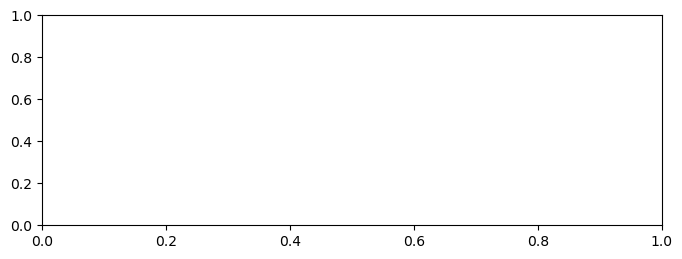

In [40]:
# Display significant coefficients and their log-odds in a bar plot
#plt.figure(figsize=(8, 6))

# Bar plot for significant coefficients
#plt.subplot(2, 1, 1)
#plt.bar(range(len(significant_coeffs)), significant_coeffs, color='blue')
#plt.xlabel('Coefficient Index')
#plt.ylabel('Coefficient Value')
#plt.title('Significant Coefficients')

# Bar plot for log-odds of significant coefficients
#plt.subplot(2, 1, 2)
#plt.bar(range(len(log_odds)), log_odds, color='green')
#plt.xlabel('Coefficient Index')
#plt.ylabel('Log-Odds')
#plt.title('Log-Odds of Significant Coefficients')

#plt.tight_layout()
#plt.show()

# Adjust threshold to 0.7 % probability

In [41]:
log_l2_bal.predict_proba(X_test_log)[: , 1]

array([0.1951919 , 0.10630919, 0.91006477, 0.67744745, 0.25838951,
       0.39117245, 0.55586589, 0.6960886 , 0.81844775, 0.49607189,
       0.29911823, 0.1299989 , 0.13812206, 0.87717131, 0.87527846,
       0.65108598, 0.94114875, 0.38665541, 0.71513362, 0.33985741,
       0.31116692, 0.52137835, 0.03385236, 0.51989424, 0.83643289,
       0.54444753, 0.92166363, 0.0789187 , 0.81977838, 0.20194909,
       0.20280502, 0.36678794, 0.6642432 , 0.86270598, 0.34003368,
       0.73119259, 0.87730921, 0.31000799, 0.19807331, 0.48043915,
       0.07802477, 0.37688961, 0.5073948 , 0.55615728, 0.46307717,
       0.12057556, 0.28938954, 0.63085618, 0.88594286, 0.89665372,
       0.17523253, 0.26581846, 0.38304577, 0.50261705, 0.35981297,
       0.10116008, 0.20231211, 0.26478641, 0.38688822, 0.31522788,
       0.91770481, 0.46457806, 0.81797081, 0.51080885, 0.10813418,
       0.18773638, 0.20374086, 0.11768861, 0.39804982, 0.81592742,
       0.46597207, 0.10409225, 0.15415572, 0.57226349, 0.28498

In [42]:
pd.Series(y_test_imp['pcs_diag'])

0      0.0
1      0.0
2      1.0
3      0.0
4      0.0
      ... 
232    0.0
233    0.0
234    0.0
235    0.0
236    1.0
Name: pcs_diag, Length: 237, dtype: float64

## Random Forest Classifier

In [49]:
#Random Forest
# Create a Random Forest classifier with 100 trees (you can adjust the number of trees) and set a random seed for reproducibility
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)  

# Fit (train) the Random Forest classifier on the balanced training data
random_forest.fit(X_train_under, y_train_under.values.ravel())


RandomForestClassifier(random_state=1)

In [50]:
# Get feature importance scores
importances=random_forest.feature_importances_
feature_importance_pairs=list(zip(X_train_under.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
pcfs_grade_status: 0.0766
fatigue_score: 0.0720
psqi_glob: 0.0666
initial_symptom_score: 0.0655
promis_cog_score: 0.0626
duration: 0.0624
phq9_total: 0.0528
dvprs_score: 0.0514
gad7_tot_score: 0.0499
hit6_score: 0.0461
pss_overall_score: 0.0421
dyspnoea_12_score: 0.0333
social_support_score: 0.0330
BMI: 0.0313
global_qol_scale: 0.0304
pre_pandemic: 0.0243
financial_stress_1: 0.0220
func_status_1: 0.0206
mental: 0.0172
vacc_bi_After: 0.0110
racial_stress: 0.0108
cardio_bi_1: 0.0075
vacc_bi_Before: 0.0072
gender_Man: 0.0070
nicotine_status_1: 0.0066
unemployment_covid_Unemp: 0.0065
ethnicity_Non: 0.0065
unemployment_covid_Emp: 0.0061
meds_1.0: 0.0059
race_White: 0.0059
participant_type_Vet: 0.0057
vacc_bi_None: 0.0052
cpt_profile_0.0: 0.0051
gender_Woman: 0.0050
tbi_prob_Mild: 0.0048
tbi_prob_None: 0.0045
cpt_profile_3.0: 0.0045
race_Black: 0.0039
cpt_profile_2.0: 0.0030
race_Asian: 0.0026
race_More: 0.0025
tbi_prob_Sev: 0.0018
unemployment_covid_Cov: 0.0018
gen

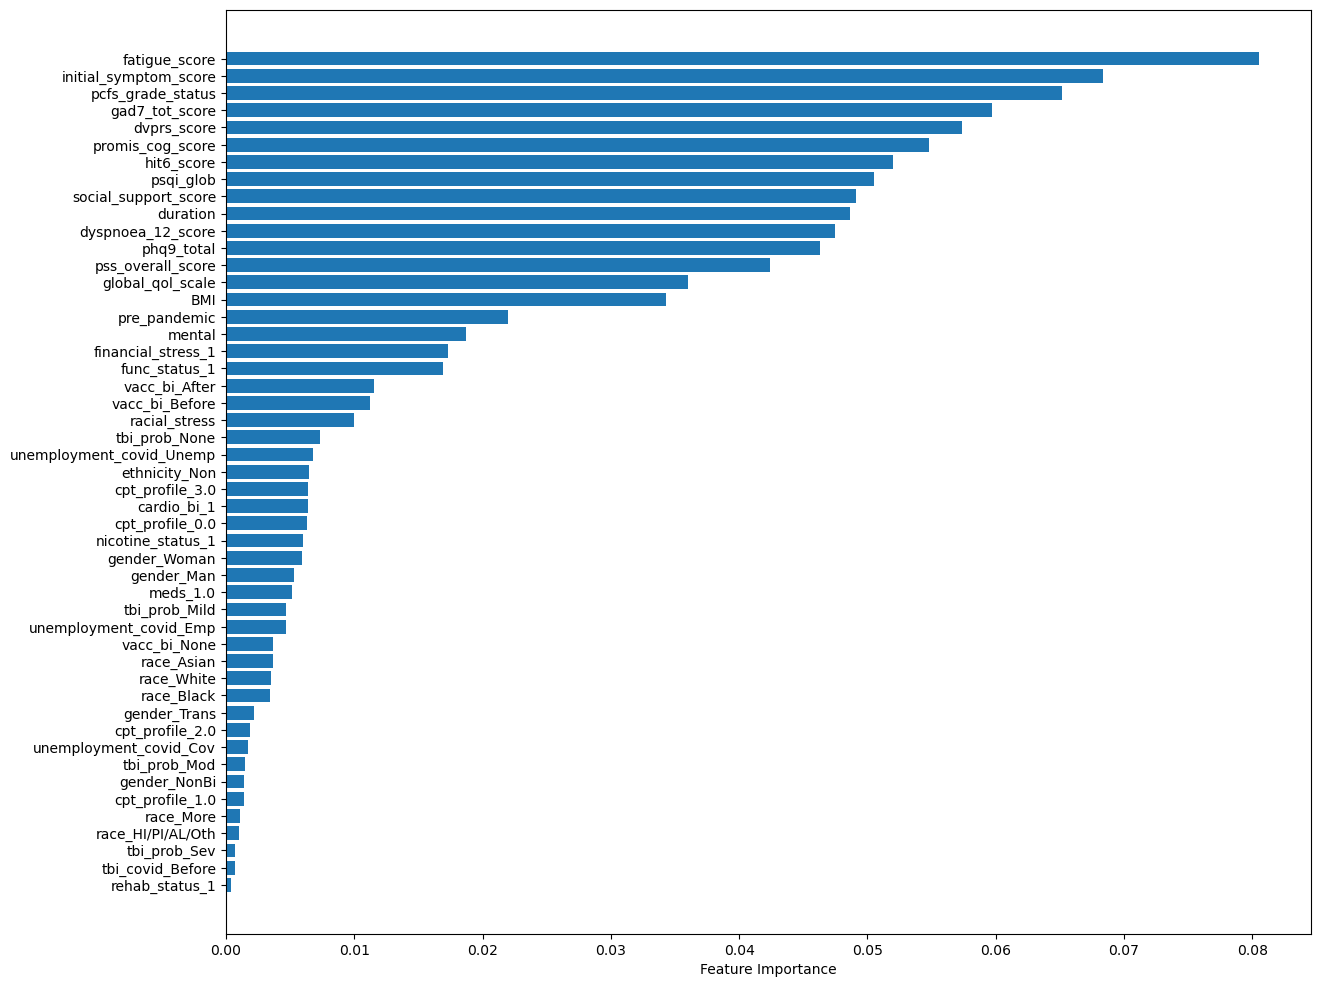

In [45]:
# Extract feature names and importances
feature_names, importances = zip(*sorted_feature_importance_pairs)

# Create a horizontal bar plot
plt.figure(figsize=(14, 12))
#plt.barh(range(len(feature_names)), importances, align='center')
#plt.yticks(range(len(feature_names)), feature_names)

plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)

plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
#plt.show()
plt.savefig('featimp.png')

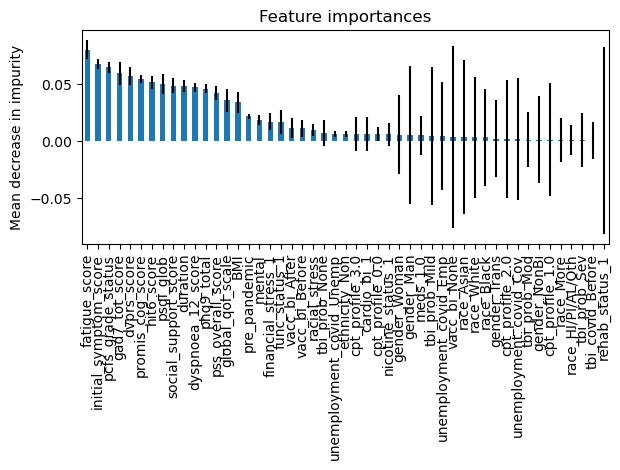

In [46]:
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



## KNN Classifier

In [47]:
# Initialize an empty list to store KNN results
knn_results = []
for k in range (1, 11):
    # Create a K-Nearest Neighbors model with k neighbors and fit it to the balanced training data
    knn_mod = KNeighborsClassifier(n_neighbors = k).fit(X_train_under, y_train_under.values.ravel())
    # Calculate and append results to the list
    knn_results.append({
        'k': k,
        'Sens': sensitivity_score(y_test_imp.values.ravel(), knn_mod.predict(X_test_pipe)),
        'Acc': accuracy_score(y_test_imp.values.ravel(), knn_mod.predict(X_test_pipe)) 
    })
# Create a DataFrame from the list of KNN results    
knn_results = pd.DataFrame(knn_results)
warnings.filterwarnings('ignore')

C:\Users\halee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\halee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [48]:
knn_results

,k,Sens,Acc
0,1,0.714286,0.717300
1,2,0.559524,0.729958
2,3,0.738095,0.725738
3,4,0.690476,0.767932
4,5,0.726190,0.751055
5,6,0.666667,0.755274
6,7,0.738095,0.734177
7,8,0.678571,0.742616
8,9,0.738095,0.734177
9,10,0.690476,0.734177


In [49]:
# Create a K-Nearest Neighbors (KNN) classifier with 4 neighbors and fit it to the balanced training data
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train_under, y_train_under.values.ravel())

## Neural Network

In [ ]:
# Create a Multi-layer Perceptron (MLP) classifier with specified settings and fit it to the balanced training data
nn = MLPClassifier(hidden_layer_sizes=(22,11), solver = 'lbfgs', random_state=1)
nn.fit(X_train_under, y_train_under.values.ravel())
warnings.filterwarnings('ignore')

## Boosted Tree

In [ ]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators' : [20,21,22,23,24],
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_search.fit(X_train_under, y_train_under.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree = tree_search.best_params_

In [ ]:
tree

# Model Performance on Test Set: Confusion Matrix, Accuracy Metrics, ROC Curve Comparison

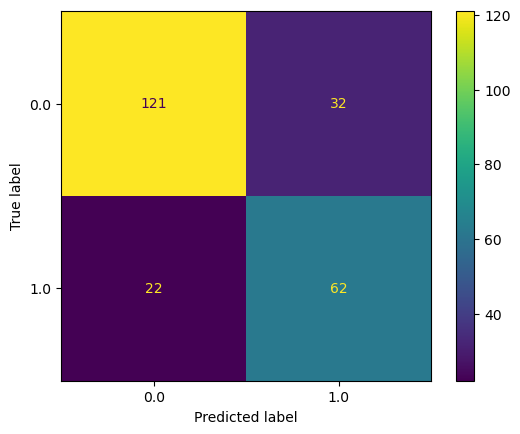

In [57]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = log_l2_bal.predict(X_test_log), labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

In [51]:
#Sensitivity, specificity, and accuracy for log reg
log_sens_bal = sensitivity_score(y_test_imp, log_l2_bal.predict(X_test_log))
log_spec_bal = specificity_score(y_test_imp, log_l2_bal.predict(X_test_log))
log_acc_bal = accuracy_score(y_test_imp, log_l2_bal.predict(X_test_log))
log_sens_bal, log_spec_bal, log_acc_bal

(0.7380952380952381, 0.7908496732026143, 0.7721518987341772)

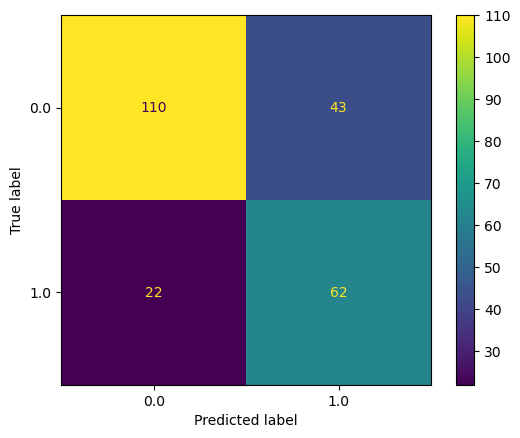

In [52]:
#KNN
# Compute the confusion matrix for KNN 
knn_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = knn.predict(X_test_pipe), labels = knn.classes_)
# Create a ConfusionMatrixDisplay object for visualization
knn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= knn_cm_bal, display_labels=knn.classes_)
knn_disp_bal.plot()
warnings.filterwarnings('ignore')
plt.show()


In [53]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced data
knn_sens_bal = sensitivity_score(y_test_imp, knn.predict(X_test_pipe))
knn_spec_bal = specificity_score(y_test_imp, knn.predict(X_test_pipe))
knn_acc_bal = accuracy_score(y_test_imp, knn.predict(X_test_pipe))
warnings.filterwarnings('ignore')
knn_sens_bal, knn_spec_bal, knn_acc_bal

(0.7380952380952381, 0.7189542483660131, 0.7257383966244726)

In [ ]:
#Neural Network
# Compute the confusion matrix for the Neural Network (nn) model on the validation data
nn_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = nn.predict(X_test_pipe), labels = nn.classes_)
nn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= nn_cm_bal, display_labels=nn.classes_)
# Plot the Neural Network confusion matrix
nn_disp_bal.plot()
plt.show() 

In [ ]:
#Sensitivity, specificity, and accuracy for neural net
nn_sens = sensitivity_score(y_test_imp, nn.predict(X_test_pipe))
nn_spec = specificity_score(y_test_imp, nn.predict(X_test_pipe))
nn_acc = accuracy_score(y_test_imp, nn.predict(X_test_pipe))
nn_sens, nn_spec, nn_acc

In [ ]:
#Confusion matrix for tree
tree_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = tree_search.predict(X_test_pipe), labels = tree_search.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree_search.classes_)
tree_disp_bal.plot()
plt.show() 

In [ ]:
#Sensitivity, specificity, and accuracy for decision tree with balanced training
#Much improved
tree_sens_bal = sensitivity_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_spec_bal = specificity_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_acc_bal = accuracy_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_sens_bal, tree_spec_bal, tree_acc_bal

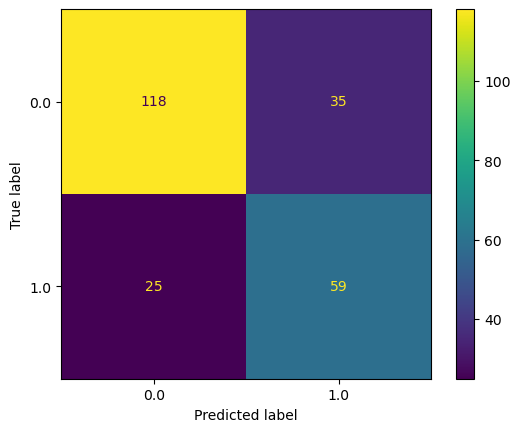

In [56]:
#RF
# Compute the confusion matrix for RF 
rf_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = random_forest.predict(X_test_pipe), labels = random_forest.classes_)
# Create a ConfusionMatrixDisplay object for visualization
rf_disp_bal = ConfusionMatrixDisplay(confusion_matrix= rf_cm_bal, display_labels=random_forest.classes_)
rf_disp_bal.plot()
warnings.filterwarnings('ignore')
#plt.show()
plt.savefig('rf_cm.png')

In [55]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced datar
rf_sens_bal = sensitivity_score(y_test_imp, random_forest.predict(X_test_pipe))
rf_spec_bal = specificity_score(y_test_imp, random_forest.predict(X_test_pipe))
rf_acc_bal = accuracy_score(y_test_imp, random_forest.predict(X_test_pipe))
warnings.filterwarnings('ignore')
rf_sens_bal, rf_spec_bal, rf_acc_bal

(0.7023809523809523, 0.7712418300653595, 0.7468354430379747)

In [ ]:
# Create a table to display performance metrics for different models on the validation dataset

val_performance = [
{'Model': 'Logistic Regression', 'Validation Sensitivity': log_sens_bal, 'Validation Specificity':log_spec_bal, 
 'Accuracy': log_acc_bal},
    {'Model': 'Boosted Tree', 'Validation Sensitivity': tree_sens_bal, 'Validation Specificity':tree_spec_bal, 
 'Accuracy': tree_acc_bal},
    {'Model': 'K-Nearest Neighbors', 'Validation Sensitivity': knn_sens_bal, 'Validation Specificity':knn_spec_bal, 
 'Accuracy': knn_acc_bal},
    {'Model': 'Neural Network', 'Validation Sensitivity': nn_sens, 'Validation Specificity':nn_spec, 
 'Accuracy': nn_acc}]
# Create a formatted table using tabulate and specify the format as 'fancy_grid'
table = tabulate(val_performance, headers='keys', tablefmt='fancy_grid')
# Display the comparison table
print(table)

In [ ]:
#ROC curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_test_imp, log_l2_bal.predict(X_test_log))
auc_log = round(roc_auc_score(y_test_imp, log_l2_bal.predict(X_test_log)), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc_log))

#ROC for decision tree
fpr, tpr, thresholds = roc_curve(y_test_imp, tree_search.predict(X_test_pipe))
auc_tree = round(roc_auc_score(y_test_imp, tree_search.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="Boosted Tree, AUC="+str(auc_tree))

#ROC for KNN
fpr, tpr, thresholds = roc_curve(y_test_imp, knn.predict(X_test_pipe))
auc_knn = round(roc_auc_score(y_test_imp, knn.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbors, AUC="+str(auc_knn))

#ROC for random forest
fpr, tpr, thresholds = roc_curve(y_test_imp, nn.predict(X_test_pipe))
auc_nn = round(roc_auc_score(y_test_imp, nn.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="Neural Network, AUC="+str(auc_nn))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curves for Validation Data')
plt.legend()
plt.savefig('ROCs.png')

# Lift Curve for Top Model

In [ ]:
#Lift curve for logistic regression on test data
plot_lift_curve(y_test_imp, log_l2_bal.predict_proba(X_test_log), title = 'Lift Curve for Logistic Regression')
plt.savefig('LogLift.png')

# Explanatory Model Training

In [74]:
#Random Forest
# Create a Random Forest classifier with 100 trees (you can adjust the number of trees) and set a random seed for reproducibility
rf_exp = RandomForestClassifier(n_estimators=100, random_state=1)  

# Fit (train) the Random Forest classifier on the balanced training data
rf_exp.fit(X_pipe, y_imp.values.ravel())

RandomForestClassifier(random_state=1)

In [75]:
# Get feature importance scores
importances_exp = rf_exp.feature_importances_
feature_importance_pairs = list(zip(X_pipe.columns, importances_exp))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
fatigue_score: 0.0778
hit6_score: 0.0712
promis_cog_score: 0.0689
dvprs_score: 0.0646
initial_symptom_score: 0.0606
dyspnoea_12_score: 0.0523
pss_overall_score: 0.0509
gad7_tot_score: 0.0492
phq9_total: 0.0471
psqi_glob: 0.0436
BMI: 0.0410
duration: 0.0385
social_support_score: 0.0353
global_qol_scale: 0.0292
pre_pandemic: 0.0254
func_status_1: 0.0251
vacc_bi_After: 0.0249
financial_stress_1: 0.0194
mental: 0.0182
racial_stress: 0.0128
vacc_bi_Before: 0.0103
cardio_bi_1: 0.0084
tbi_prob_Mild: 0.0081
meds_1.0: 0.0077
participant_type_Vet: 0.0076
nicotine_status_1: 0.0073
gender_Man: 0.0069
cpt_profile_3.0: 0.0067
unemployment_covid_Unemp: 0.0067
race_White: 0.0066
cpt_profile_0.0: 0.0066
vacc_bi_None: 0.0062
cpt_profile_1.0: 0.0053
gender_Woman: 0.0052
tbi_prob_None: 0.0050
unemployment_covid_Emp: 0.0050
ethnicity_Non: 0.0049
tbi_prob_Mod: 0.0043
race_Asian: 0.0041
race_More: 0.0035
race_Black: 0.0031
tbi_covid_Before: 0.0029
race_HI/PI/AL/Oth: 0.0027
cpt_profi

In [28]:
pwd

'C:\\Users\\halee'

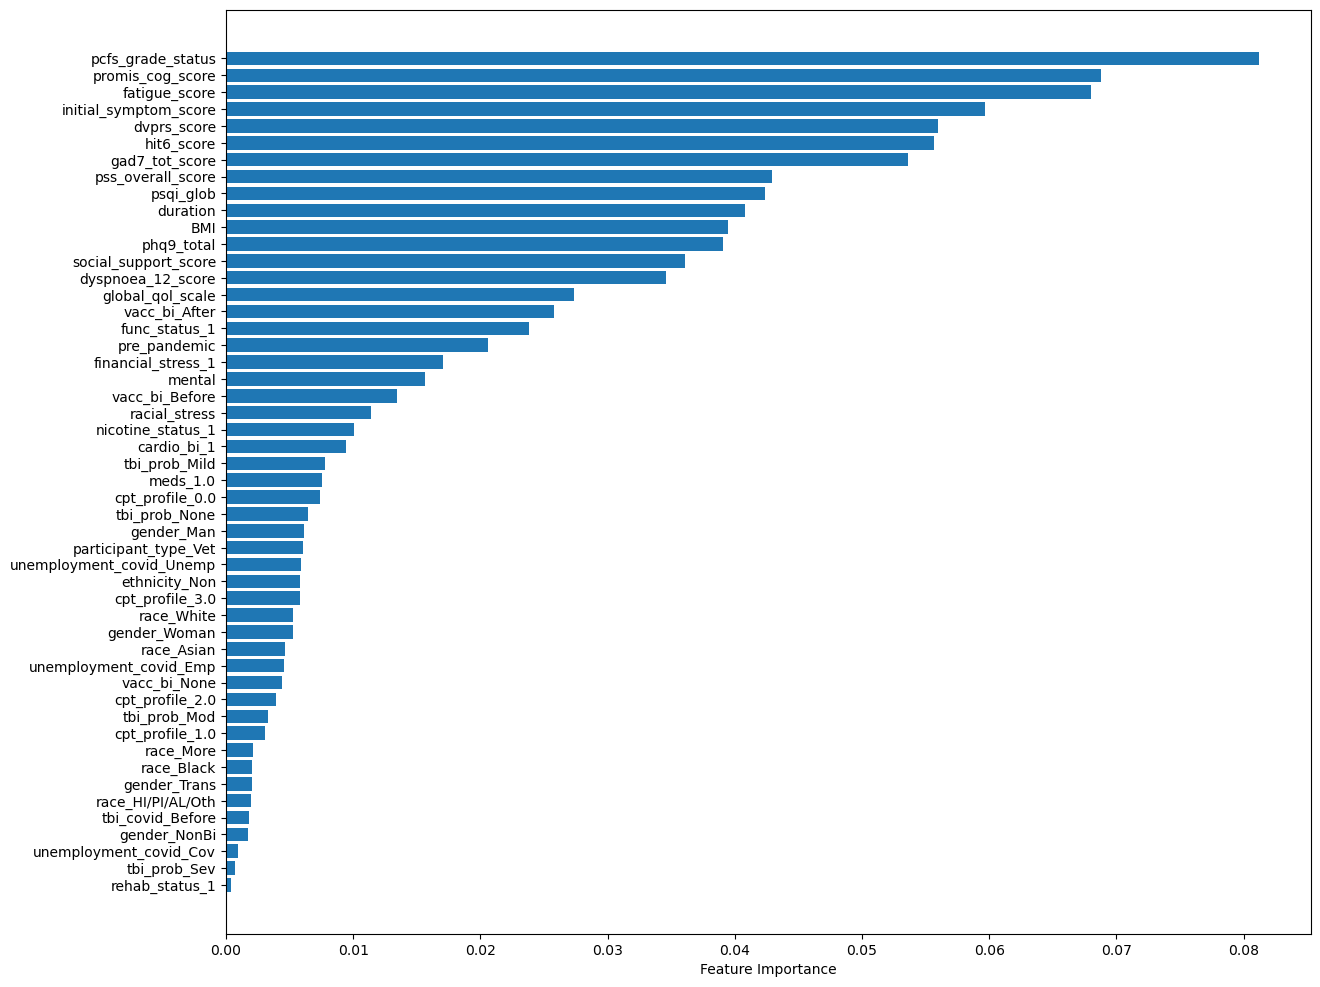

In [27]:
# Extract feature names and importances
feature_names, importances = zip(*sorted_feature_importance_pairs)

# Create a horizontal bar plot
plt.figure(figsize=(14, 12))
#plt.barh(range(len(feature_names)), importances, align='center')
#plt.yticks(range(len(feature_names)), feature_names)

plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)

plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
#plt.show()
plt.savefig('featimp.png')

In [76]:
# Create Logistic Regression model with L2 regularization
log_l2 = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1)
# Fit the model to the training data
log_l2.fit(X_log, y_imp.values.ravel())

C:\Users\halee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\halee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegressionCV(cv=5, random_state=1)

In [77]:
log_l2.intercept_

array([-0.42528739])

In [78]:
# Show coefficents w/ feature names 
coeffs = pd.DataFrame({
    'Feature': X_log.columns,
    'Coefficient': log_l2.coef_[0]
})

#Sort in descending order by absolute value
coeffs = coeffs.loc[coeffs['Coefficient'].abs().argsort()[::-1]]
coeffs

,Feature,Coefficient
21,vacc_bi_After,0.799182
12,nicotine_status_1,0.570965
31,phq9_total,-0.547104
0,cpt_profile_1.0,0.532125
29,fatigue_score,0.493004
30,gad7_tot_score,0.418426
4,gender_NonBi,-0.410427
36,BMI,0.347367
19,tbi_prob_Sev,-0.314287
35,dyspnoea_12_score,0.313726
